## In Depth: Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## `Simple Linear Regression`

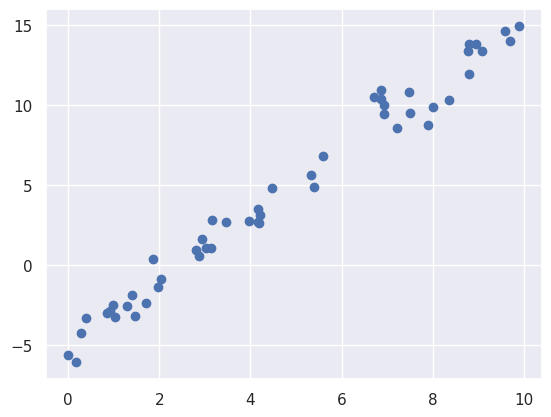

In [2]:
rng =np.random.RandomState(1)
x =10 * rng.rand(50)
y =2 * x -5 + rng.randn(50)
plt.scatter(x,y)

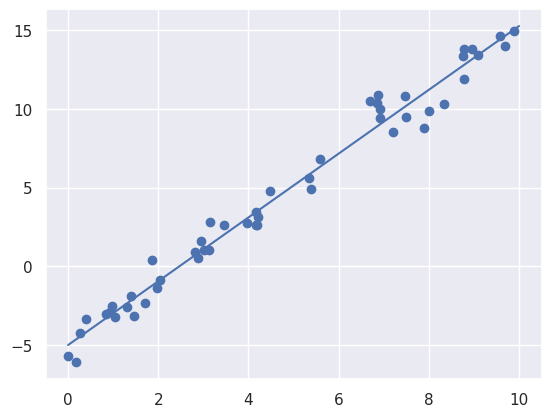

In [4]:
# We can use Scikit-learn LinearRegression estimator to fit this data and construct the best-fit line

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit =np.linspace(0, 10, 1000)
yfit =model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

The slope and intercept of the data are contained in the model’s fit parameters, which
in Scikit-Learn are always marked by a trailing underscore. Here the relevant parame‐
ters are coef_ and intercept_:

In [5]:
print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)


Model slope: 2.0272088103606953
Model intercept: -4.998577085553204


In [6]:
# using Numpy matrix multiplication operator

rng =np.random.RandomState(1)
X =10 * rng.rand(100, 3)
y =0.5 +np.dot(X, [1.5, -2., 1.])

model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


`Polynomial basis functions`

This polynomial projection is useful enough that it is built into Scikit-learn, using the PolynomialFeatures transformer:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x =np.array([2, 3, 4])
poly =PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [8]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

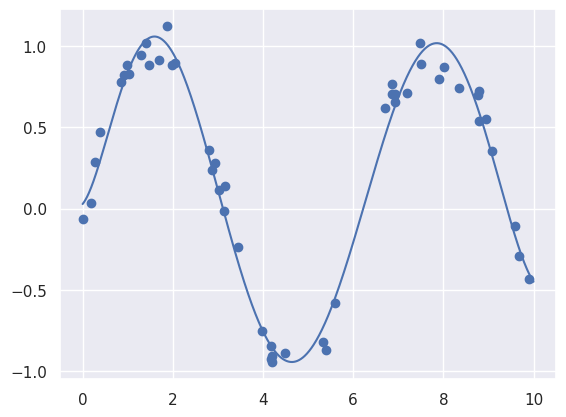

In [9]:
rng =np.random.RandomState(1)
x =10 * rng.rand(50)
y =np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit =poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

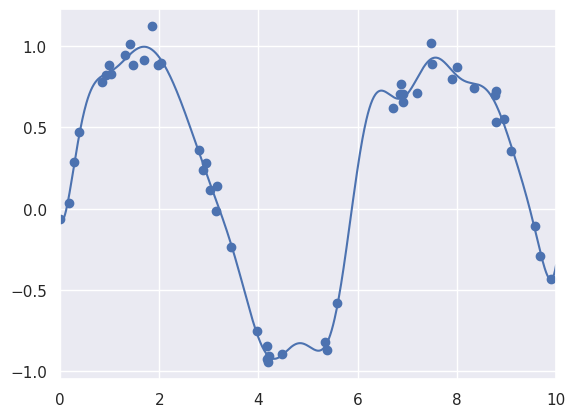

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)
gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

`Regularization`

(-1.5, 1.5)

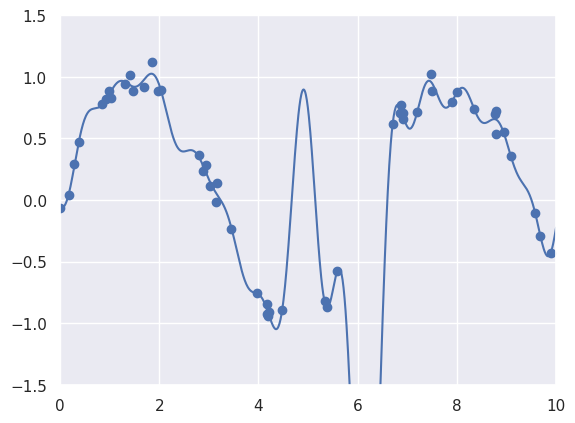

In [13]:
model =make_pipeline(GaussianFeatures(30),
                     LinearRegression())

model.fit(x[:, np.newaxis], y)
plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [14]:
def basis_plot(model, title=None):
    fig, ax =plt.subplot(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0,10))
    
    model =make_pipeline(GaussianFeatures(30), LinearRegression())
    basis_plot(model)

`Ridge regression (L2 regularization)`

In [ ]:
from sklearn.linear_model import Ridge

model =make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model)

`Lasso regularization (L1)`

In [ ]:
from sklearn.linear_model import Lasso
model =make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')